In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.population_model as pop
import lbg_forecast.noise as noise
import lbg_forecast.selection as sel
import lbg_forecast.nz_sim as nz
import lbg_forecast.lyalpha as ly
import os
from getdist import plots, MCSamples

In [2]:
def numpy_to_mcsamples(array, names, label):
    "convenience function used for plotting using getdist"
    samples = np.copy(array)
    samples[:, -1] = np.log10(samples[:, -1])
    samples[:, 8] = np.log10(samples[:, 8])
    return MCSamples(samples=samples, names=names, label=label)

def plot_samples(all, u, g, r):
    "plot triangle plot for sps parameters"
    plotter = plots.get_subplot_plotter()
    names = pop.sps_parameter_names()#["zred", "logzsol", "dust1", "dust2", "dust_index", 
            #          "igm_factor", "gas_logu", "logfagn", "agn_tau",
            #           "logf1", "logf2", "logf3", "logf4", "logf5","logf6", "logmass"]
    
    s1 = numpy_to_mcsamples(all, names, label = "global population")
    s2 = numpy_to_mcsamples(u, names, label = "u-dropouts")
    s3 = numpy_to_mcsamples(g, names, label = "g-dropouts")
    s4 = numpy_to_mcsamples(r, names, label = "r-dropouts")
    
    plotter.triangle_plot([s1, s2, s3, s4], Filled=False, contour_lws=2, colors=["black", "blue", "red", "green"], contour_colors=["black", "blue", "red", "green"])

In [3]:
#counts how many individual files of a given type there are (i.e. number of simulation runs)
files = os.listdir("simulation_data")
run_count = 0
for file in files:
    if("sps_parameters" in file):
        
        run_count+=1
print(run_count)

#loads files
sps_parameters = []
photometry = []
spectra = []
for run in range(run_count):
    if("sps_parameters_"+str(run)+".npy" in set(files)):
        sps_parameters.append(np.load("simulation_data/sps_parameters_"+str(run)+".npy"))
        #photometry.append(np.load("simulation_data/simulated_photometry_"+str(run)+".npy"))
        #spectra.append(np.load("simulation_data/spectra_"+str(run)+".npy"))
sps_parameters = np.vstack(sps_parameters)
#photometry = np.vstack(photometry)
#spectra = np.vstack(spectra)
wavelengths = np.load("simulation_data/wavelengths_0.npy")

20160


In [5]:
np.save("training_data/sps_parameters_"+str(sps_parameters.shape[0])+".npy", sps_parameters)

In [6]:
#counts how many individual files of a given type there are (i.e. number of simulation runs)
files = os.listdir("simulation_data")
run_count = 0
for file in files:
    if("sps_parameters" in file):
        
        run_count+=1
print(run_count)

#loads files
sps_parameters = []
photometry = []
spectra = []
for run in range(run_count):
    if("sps_parameters_"+str(run)+".npy" in set(files)):
        #sps_parameters.append(np.load("simulation_data/sps_parameters_"+str(run)+".npy"))
        photometry.append(np.load("simulation_data/simulated_photometry_"+str(run)+".npy"))
        #spectra.append(np.load("simulation_data/spectra_"+str(run)+".npy"))
#sps_parameters = np.vstack(sps_parameters)
photometry = np.vstack(photometry)
#spectra = np.vstack(spectra)
wavelengths = np.load("simulation_data/wavelengths_0.npy")

20160


In [7]:
np.save("training_data/photometry_"+str(photometry.shape[0])+".npy", photometry)

In [8]:
#counts how many individual files of a given type there are (i.e. number of simulation runs)
files = os.listdir("simulation_data")
run_count = 0
for file in files:
    if("sps_parameters" in file):
        
        run_count+=1
print(run_count)

#loads files
sps_parameters = []
photometry = []
spectra = []
for run in range(run_count):
    if("sps_parameters_"+str(run)+".npy" in set(files)):
        #sps_parameters.append(np.load("simulation_data/sps_parameters_"+str(run)+".npy"))
        #photometry.append(np.load("simulation_data/simulated_photometry_"+str(run)+".npy"))
        spectra.append(np.load("simulation_data/spectra_"+str(run)+".npy"))
#sps_parameters = np.vstack(sps_parameters)
#photometry = np.vstack(photometry)
spectra = np.vstack(spectra)
wavelengths = np.load("simulation_data/wavelengths_0.npy")

20160


In [9]:
np.save("training_data/spectra_"+str(spectra.shape[0])+".npy", spectra)

In [11]:
np.save("training_data/wavelengths_0.npy", wavelengths)

In [12]:
sources = noise.get_noisy_magnitudes(sps_parameters, photometry, random_state=42)
colours = sel.colours(sources)
uparams, gparams, rparams = nz.apply_cuts(colours, return_all_params=True)
uparams.shape

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

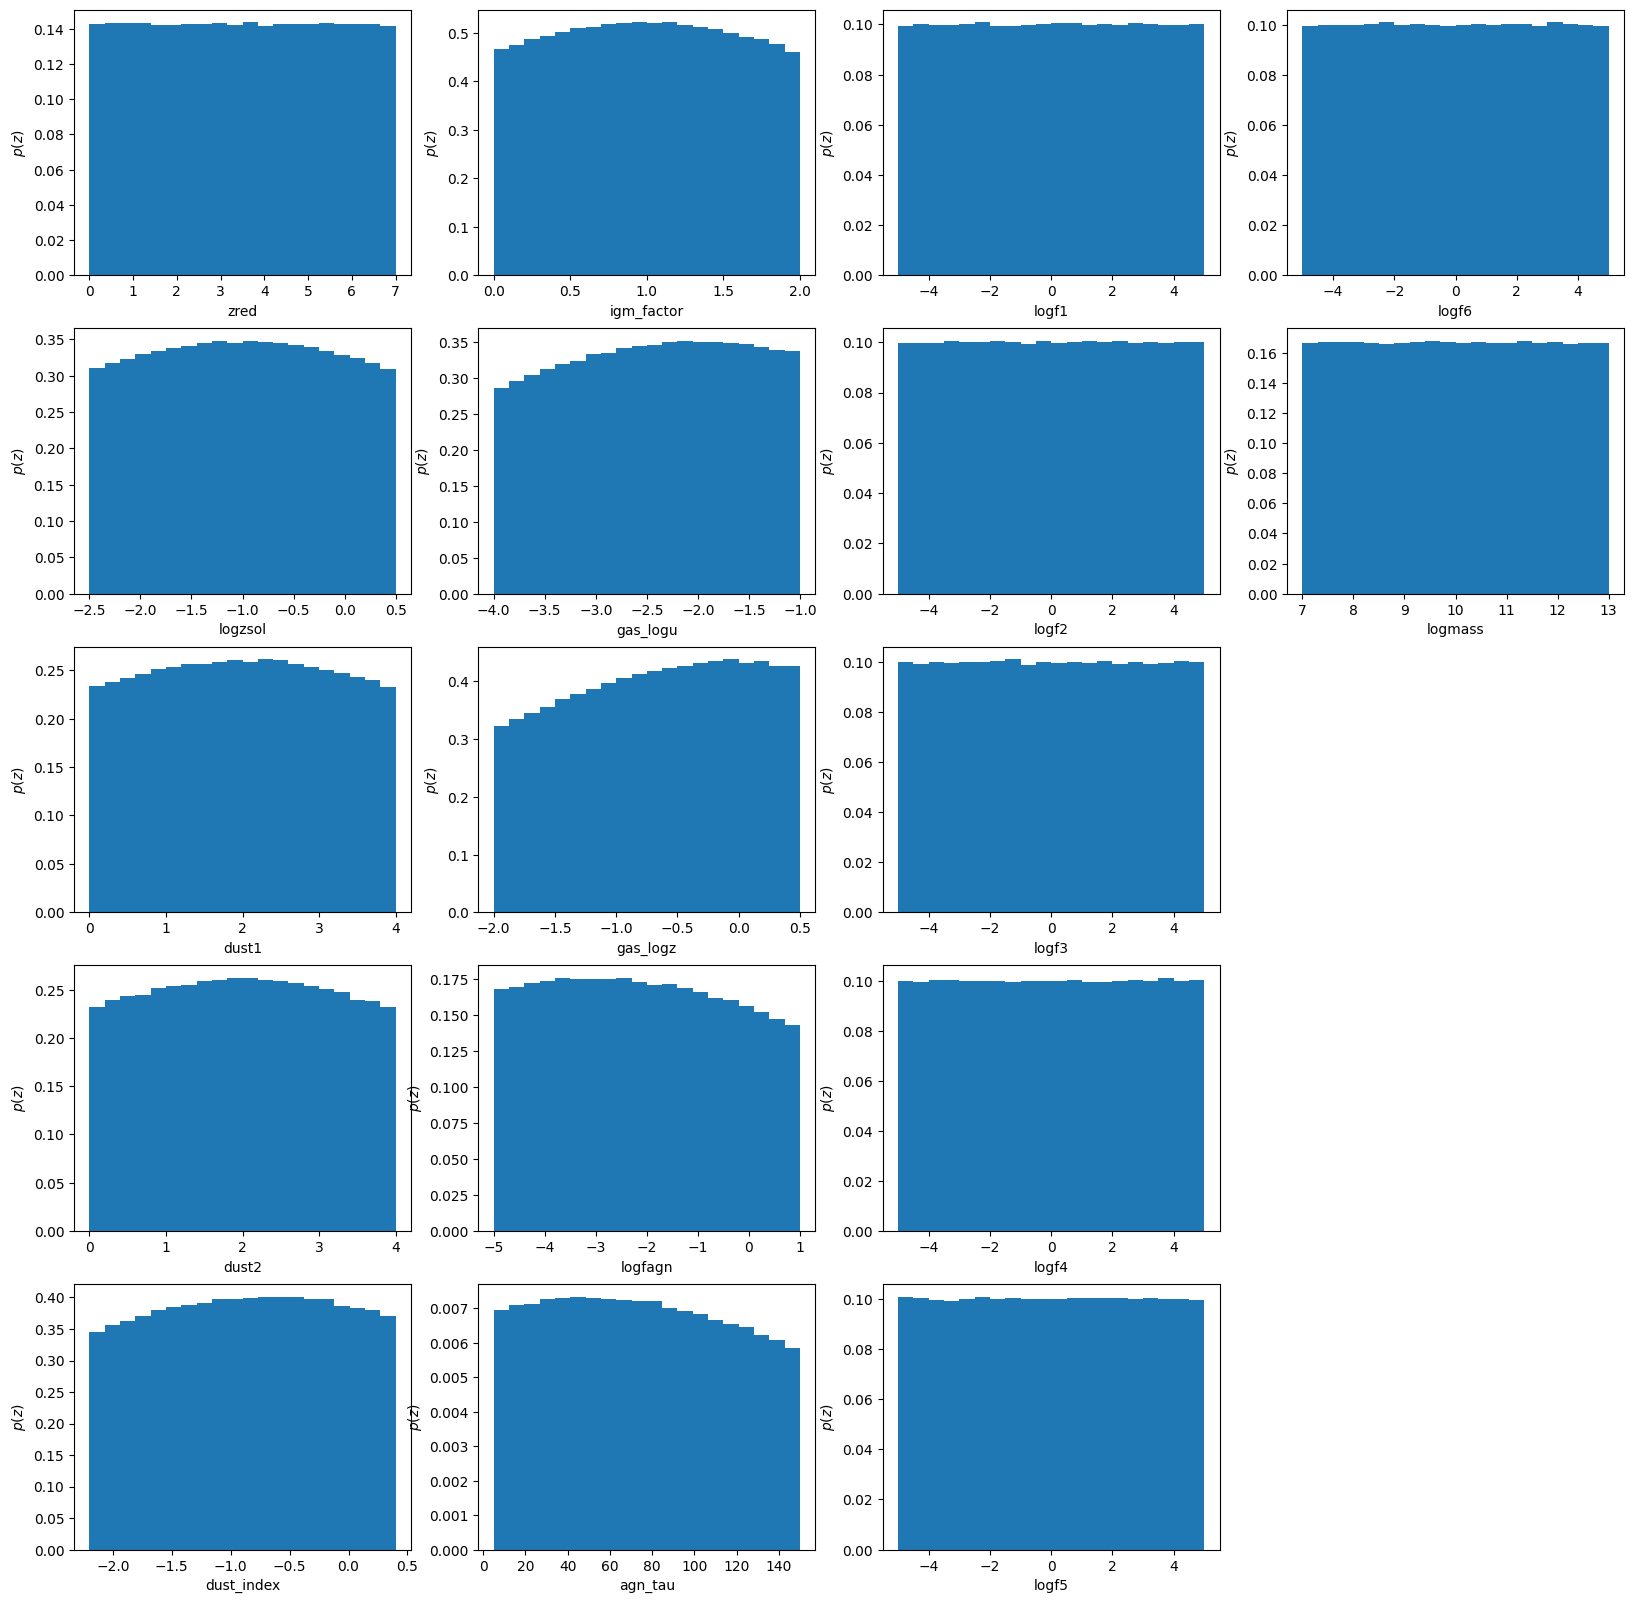

In [8]:
pop.plot_galaxy_population(sps_parameters)

(0.0, 7.0)

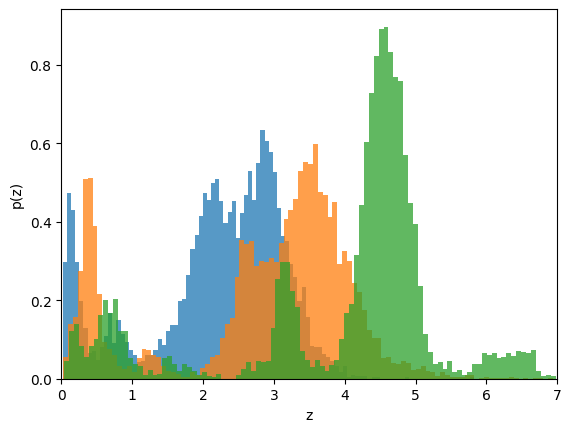

In [9]:
bins = 100
alpha = 0.75
plt.hist(uparams[:, 0], bins=bins, density=True, alpha=alpha)
plt.hist(gparams[:, 0], bins=bins, density=True, alpha=alpha)
plt.hist(rparams[:, 0], bins=bins, density=True, alpha=alpha)
plt.xlabel('z')
plt.ylabel('p(z)')
plt.xlim(0, 7)

In [10]:
#plot_samples(sps_parameters, uparams, gparams, rparams)